## Example Script for Horizontal Flipping

In [3]:
from PIL import Image, ImageSequence
import vidaug.augmentors as va

In [5]:
def gif_loader(path, modality="RGB"):
    frames = []
    with open(path, 'rb') as f:
        with Image.open(f) as video:
            index = 1
            for frame in ImageSequence.Iterator(video):
                frames.append(frame.convert(modality))
                index += 1
        return frames


In [29]:
hf = gif_loader("../videos/flipped.gif")[0]
sh = gif_loader("../videos/shear.gif")[0]
gb = gif_loader("../videos/blurred.gif")[0]
salt = gif_loader("../videos/salt.gif")[0]
pepper = gif_loader("../videos/pepper.gif")[0]
add = gif_loader("../videos/add.gif")[0]
mul = gif_loader("../videos/multiply.gif")[0]
rot = gif_loader("../videos/rotated.gif")[0]

frames = [hf, sh, gb, salt, rot ,mul, add, pepper]


In [30]:
width, height = hf.size

grid_image = Image.new('RGBA', (width * 4, height * 2))

# Place each frame into the grid
for index, frame in enumerate(frames):
    x = (index % 4) * width  # Calculate x position
    y = (index // 4) * height  # Calculate y position
    grid_image.paste(frame, (x, y))

# Save the combined image


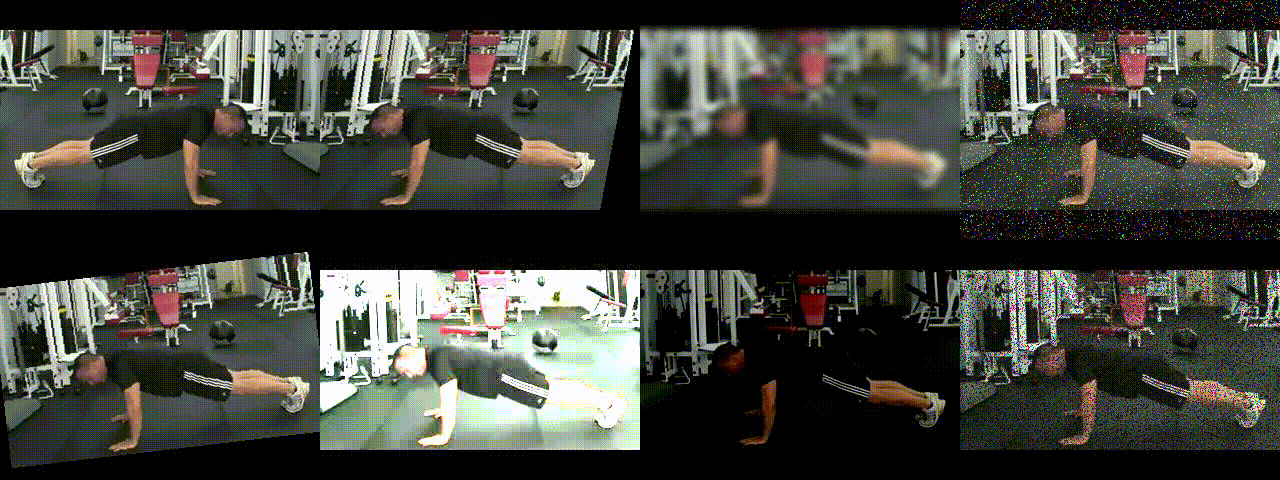

In [31]:
grid_image

In [32]:
grid_image.save('combined_image.png')

In [5]:
sometimes = lambda aug: va.Sometimes(1, aug) # Used to apply augmentor with 100% probability
seq = va.Sequential([ # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.HorizontalFlip()) # horizontally flip the video with 100% probability
])

In [6]:
#augment the frames
video_aug = seq(frames)

In [7]:
# save augmentad frames as gif 
video_aug[0].save("out.gif", save_all=True, append_images=video_aug[1:], duration=100, loop=0)
